In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [2]:
doc_list = []
y_all = []

for i in range(1, 2594):
    with open(f"./News/semiconductor/content/{i}.txt", 'r', encoding='UTf-8') as file:
        doc_list.append(file.read())
        y_all.append(1)  # semiconductors
        
for i in range(1, 1680):
    with open(f"./News/industrial_automation/content/{i}.txt", 'r', encoding='UTf-8') as file:
        doc_list.append(file.read())
        y_all.append(2)  # industrial automation
        
for i in range(1, 2437):
    with open(f"./News/ev/content/{i}.txt", 'r', encoding='UTf-8') as file:
        doc_list.append(file.read())
        y_all.append(3)  # ev

for i in range(1, 1090):
    with open(f"./News/MIT_AI/content/{i}.txt", 'r', encoding='UTf-8') as file:
        doc_list.append(file.read())
        y_all.append(4)  # AI

for i in range(1, 968):
    with open(f"./News/AI_supplement/content/{i}.txt", 'r', encoding='UTf-8') as file:
        doc_list.append(file.read())
        y_all.append(4)  # AI

print(len(doc_list), len(y_all))
external_index = len(doc_list)

8764 8764


In [3]:
for i in range(1, 26):
    with open(f"./News/external/semiconductors/{i}.txt", 'r', encoding='UTF-8')as file:
        doc_list.append(file.read())
        y_all.append(1)

for i in range(1, 26):
    with open(f"./News/external/industrial_automation/{i}.txt", 'r', encoding='UTF-8')as file:
        doc_list.append(file.read())
        y_all.append(2)

for i in range(1, 26):
    with open(f"./News/external/ev/{i}.txt", 'r', encoding='UTF-8')as file:
        doc_list.append(file.read())
        y_all.append(3)

for i in range(1, 26):
    with open(f"./News/external/AI/{i}.txt", 'r', encoding='UTF-8')as file:
        doc_list.append(file.read())
        y_all.append(4)

for i in range(1, 97):
    with open(f"./News/external/others/{i}.txt", 'r', encoding='UTF-8')as file:
        doc_list.append(file.read())
        y_all.append(-1)  # novelty

print(len(doc_list), len(y_all))

8960 8960


In [4]:
X_all = TfidfVectorizer().fit_transform(doc_list)
X = X_all[:external_index]
X_extern = X_all[external_index:]
y = y_all[:external_index]
y_extern = y_all[external_index:]
svm_model = SVC()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2023, stratify=y)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.97      0.97       259
           2       0.96      0.96      0.96       168
           3       0.97      0.97      0.97       244
           4       0.98      0.98      0.98       206

    accuracy                           0.97       877
   macro avg       0.97      0.97      0.97       877
weighted avg       0.97      0.97      0.97       877



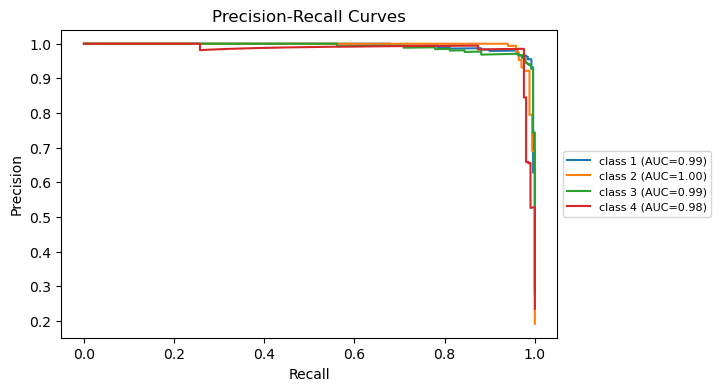

In [6]:
# get prediction probabilities
y_probs = svm_model.decision_function(X_test)

# plot precision-recall curves
fig, ax = plt.subplots(figsize=(8, 4))
for cls in range(1, 5):
  precision, recall, _ = precision_recall_curve(y_test, y_probs[:, cls - 1], pos_label=cls)
  auc_score = auc(recall, precision)
  plt.plot(recall, precision, label=f"class {cls} (AUC={auc_score:.2f})")
plt.title("Precision-Recall Curves")
plt.xlabel("Recall")
plt.ylabel("Precision")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(fontsize=8, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [7]:
from sklearn.svm import OneClassSVM

oc_svm_model = OneClassSVM(nu=0.1)
oc_svm_model.fit(X)
svm_model_final = SVC()
svm_model_final.fit(X, y)

y_extern_pred_novelty = oc_svm_model.predict(X_extern)
y_extern_pred_class = svm_model_final.predict(X_extern)
y_extern_pred = [-1 if y_extern_pred_novelty[i] == -1 else y_extern_pred_class[i]
                    for i in range(len(y_extern_pred_class))]

In [8]:
extern_indexes = [0, 25, 50, 75, 100]
print(y_extern_pred[extern_indexes[0]:extern_indexes[1]])
print(y_extern_pred[extern_indexes[1]:extern_indexes[2]])
print(y_extern_pred[extern_indexes[2]:extern_indexes[3]])
print(y_extern_pred[extern_indexes[3]:extern_indexes[4]])
print(y_extern_pred[extern_indexes[4]:])

print("\nClassificaiton Report for Normal Samples:")
print(classification_report(y_extern[:extern_indexes[4]], y_extern_pred[:extern_indexes[4]],
                            zero_division=0, labels=[1, 2, 3, 4]))

print("\nClassificaiton Report for Novelties:")
print(classification_report(y_extern[extern_indexes[4]:], y_extern_pred[extern_indexes[4]:],
                            zero_division=0, labels=[-1]))

print("\nClassificaiton Report for All:")
print(classification_report(y_extern, y_extern_pred, zero_division=0))

[-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, -1, 3, 3, 2, -1, 3, 3]
[4, 4, 4, 4, -1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, -1, 4, 4, 4, 4, 4]
[1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 4, 3, 4, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 2, 1, 1, 1, -1, 4, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 3, -1, 2, -1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 4, -1, -1, 1, 4, 1, -1, 4, -1, -1, 4]

Classificaiton Report for Normal Samples:
              precision    recall  f1-score   support

           1       1.00      0.88      0.94        25
           2       0.86      0.96      0.91        25
           3       1.00      0.80      0.89        25
           4       0.96      0.92      0.94        25

   micro avg       0.95      0.89      0.92       10

In [9]:
from sklearn.metrics import recall_score

nus = np.arange(0.1, 1.0, 0.1)
normal_recalls = []
novelty_recalls = []

for nu in nus:
    oc_svm_model = OneClassSVM(nu=nu)  # try to fit with different nus
    oc_svm_model.fit(X)
    
    y_extern_pred_novelty = oc_svm_model.predict(X_extern)
    y_extern_pred = [-1 if y_extern_pred_novelty[i] == -1 else y_extern_pred_class[i]  # pred_class is always the same
                        for i in range(len(y_extern_pred_class))]
    
    normal_recalls.append(recall_score(y_extern[:extern_indexes[4]], y_extern_pred[:extern_indexes[4]],
                                        average='macro', labels=[1, 2, 3, 4]))
    novelty_recalls.append(recall_score(y_extern[extern_indexes[4]:], y_extern_pred[extern_indexes[4]:],
                                        average='macro', labels=[-1])) 

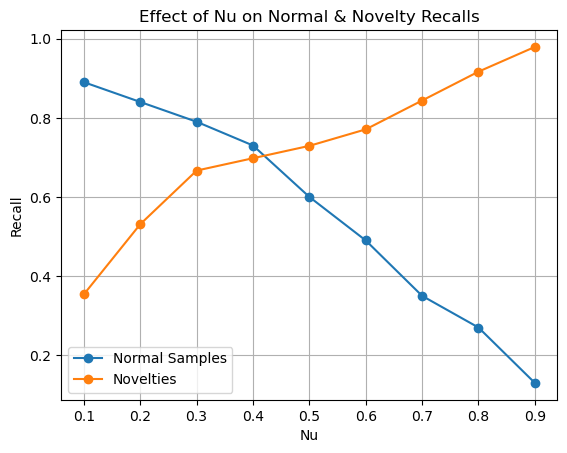

In [10]:
plt.title("Effect of Nu on Normal & Novelty Recalls")
plt.plot(nus, normal_recalls, "o-", label="Normal Samples")
plt.plot(nus, novelty_recalls, "o-", label="Novelties")
plt.xticks(nus)
plt.xlabel("Nu")
plt.ylabel("Recall")
plt.legend()
plt.grid()
plt.show()